In [1]:
import sympy as sy
import heppackv0 as hep

Reading heppackv0.py (july 2022)

Done


Verify the following table with heppackv0
$$
\begin{tabular}{ccccccc}\\ 
   & $u$ & $+p_z$ & $+s_z$ & $+\lambda$ & $L$ & $R$\\ 
P & $u$ & $-p_z$ & $+s_z$ & $-\lambda$   & $R$ & $L$ \\
C & $v$ & $+p_z$ & $+s_z$ & $+\lambda$ & $L$ & $R$ \\
T & $u$ & $-p_z$ & $-s_z$ & $+\lambda$ & $L$ & $R$ \\
PT & $u$ & $+p_z$ & $-s_z$ & $-\lambda$ & $R$ & $L$ \\
CP & $v$ & $-p_z$ & $+s_z$ & $-\lambda$ & $R$ & $L$\\
CPT & $v$ & $+p_z$ & $-s_z$ & $-\lambda$ & $R$ & $L$ 
\end{tabular}
$$

In [2]:
E,m,theta,phi = sy.symbols("E,m,theta,phi",positive=True)

In [3]:
up = hep.u_r(E,m,theta,phi)
upR = hep.projpl*up
upL = hep.projm*up
un = hep.u_l(E,m,theta,phi)
unR = hep.projpl*un
unL = hep.projm*un
vp = hep.v_r(E,m,theta,phi)
vpR = hep.projm*vp
vpL = hep.projpl*vp
vn = hep.v_l(E,m,theta,phi)
vnR = hep.projm*vn
vnL = hep.projpl*vn

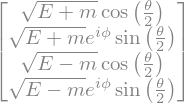

In [4]:
up

In [4]:
def spinor(uv, psign=1, sign=1, phase=0):
    """
    Apply sign change in momentum and phase change of spinor
    uv: spinor as given in heppackv0
    psign: 
        -1: reverse momentum
    sign:
        multiply spinor with sign*sy.exp(phase*sy.I*phi)
    """
    
    r = sign * uv * sy.exp(phase*sy.I*phi)
    if psign==-1:
        r1 = r.subs(theta,sy.pi-theta).subs(phi,phi+sy.pi)
    else:
        r1 = r
    r2 = sy.simplify(r1).expand()
    return r2    

In [5]:
def P(uv):
    """
    Calculate parity operation on spinor uv. 
    """
    r = hep.g0*uv
    return sy.simplify(r).expand()

In [6]:
def C(uv):
    r = sy.I*hep.g2*uv.subs(phi,-phi)
    return sy.simplify(r).expand()

In [7]:
def T(uv):
    r = hep.g1*hep.g3*uv.subs(phi,-phi)
    return sy.simplify(r).expand()

In [15]:
# Check parity 
rup = P(up) == spinor(un,psign=-1,sign=-1,phase=1)
run = P(un) == spinor(up,psign=-1,sign=1,phase=-1)
rvp = P(vp) == spinor(vn,psign=-1,sign=-1,phase=-1)
rvp = P(vp) == spinor(vn,psign=-1,sign=-1,phase=-1)
rvn = P(vn) == spinor(vp,psign=-1,sign=1,phase=1)
#
display("P up(p) == un(-p): "+str(rup))
display("P un(p) == up(-p): "+str(run))
display("P vp(p) == vn(-p): "+str(rvp))
display("P vn(p) == vp(-p): "+str(rvn))
display("With chiral states")
rupR = P(upR) == spinor(unL,psign=-1,sign=-1,phase=1)
rupL = P(unL) == spinor(upR,psign=-1,sign=1,phase=-1)
rvpR = P(vpR) == spinor(vnL,psign=-1,sign=-1,phase=-1)
rvpL = P(vpL) == spinor(vnR,psign=-1,sign=-1,phase=-1)

display("P upR(p) == unL(-p): "+str(rupR))
display("P upL(p) == unR(-p): "+str(rupL))
display("P vpR(p) == vnL(-p): "+str(rvpR))
display("P vpL(p) == vnR(-p): "+str(rvpL))

'P up(p) = un(-p): True'

'P un(p) = up(-p): True'

'P vp(p) = vn(-p): True'

'P vn(p) = vp(-p): True'

'With chiral states'

'P upR(p) == unL(-p): True'

'P upL(p) == unR(-p): True'

'P vpR(p) == vnL(-p): True'

'P vpL(p) == vnR(-p): True'

In [16]:
# check C
rup = C(up) == spinor(vp,psign=1,sign=1,phase=0)
run = C(un) == spinor(vn,psign=1,sign=-1,phase=0)
rvp = C(vp) == spinor(up,psign=1,sign=1,phase=0)
rvn = C(vn) == spinor(un,psign=1,sign=-1,phase=0)
#
rupR = C(upR) == spinor(vpR,psign=1,sign=1,phase=0)
rupL = C(upL) == spinor(vpL,psign=1,sign=1,phase=0)
#
display("C up(p) == vp(p): "+str(rup))
display("C un(p) == vn(p): "+str(run))
display("C vp(p) == up(p): "+str(rvp))
display("C vn(p) == un(p): "+str(rvn))
display("With chiral states")
display("C upR(p) == vpR(p): "+str(rupR))
display("C upL(p) == vpL(p): "+str(rupL))

'C up(p) == vp(p): True'

'C un(p) == vn(p): True'

'C vp(p) == up(p): True'

'C vn(p) == un(p): True'

'With chiral states'

'C upR(p) == vpR(p): True'

'C upL(p) == vpL(p): True'

In [17]:
# check T
rup = T(up) == spinor(up,psign=-1,sign=-1,phase=-1)
run = T(un) == spinor(un,psign=-1,sign=-1,phase=1)
rvp = T(vp) == spinor(vp,psign=-1,sign=-1,phase=1)
rvn = T(vn) == spinor(vn,psign=-1,sign=-1,phase=-1)
#
rupR = T(upR) == spinor(upR,psign=-1,sign=-1,phase=-1)
rupL = T(upL) == spinor(upL,psign=-1,sign=-1,phase=-1)
#
display("T up(p) == up(-p): "+str(rup))
display("T un(p) == un(-p): "+str(run))
display("T vp(p) == vp(-p): "+str(rvp))
display("T vn(p) == vn(-p): "+str(rvn))
display("With chiral states")
display("T upR(p) == upR(-p): "+str(rupR))
display("T upL(p) == upL(-p): "+str(rupL))

'T up(p) == up(-p): True'

'T un(p) == un(-p): True'

'T vp(p) == vp(-p): True'

'T vn(p) == vn(-p): True'

'With chiral states'

'T upR(p) == upR(-p): True'

'T upL(p) == upL(-p): True'

In [18]:
# check PT
rup = P(T(up)) == spinor(un,psign=1,sign=-1,phase=0)
run = P(T(un)) == spinor(up,psign=1,sign=1,phase=0)
rvp = P(T(vp)) == spinor(vn,psign=1,sign=-1,phase=0)
rvn = P(T(vn)) == spinor(vp,psign=1,sign=1,phase=0)
#
rupR = P(T(upR)) == spinor(unL,psign=1,sign=-1,phase=0)
rupL = P(T(upL)) == spinor(unR,psign=1,sign=-1,phase=0)
#
display("PT up(p) == un(p): "+str(rup))
display("PT un(p) == up(p): "+str(run))
display("PT vp(p) == vn(p): "+str(rvp))
display("PT vn(p) == vp(p): "+str(rvn))
display("With chiral states")
display("PT upR(p) == unL(p): "+str(rupR))
display("PT upL(p) == upR(p): "+str(rupL))

'PT up(p) == un(p): True'

'PT un(p) == up(p): True'

'PT vp(p) == vn(p): True'

'PT vn(p) == vp(p): True'

'With chiral states'

'PT upR(p) == unL(p): True'

'PT upL(p) == upR(p): True'

In [20]:
# check CP
rup = C(P(up)) == spinor(vn,psign=-1,sign=1,phase=-1)
run = C(P(un)) == spinor(vp,psign=-1,sign=1,phase=1)
rvp = C(P(vp)) == spinor(un,psign=-1,sign=1,phase=1)
rvn = C(P(vn)) == spinor(up,psign=-1,sign=1,phase=-1)
#
rupR = C(P(upR)) == spinor(vnL,psign=-1,sign=1,phase=-1)
rupL = C(P(upL)) == spinor(vnR,psign=-1,sign=1,phase=-1)
#
display("CP up(p) == vn(-p): "+str(rup))
display("CP un(p) == vp(-p): "+str(run))
display("CP vp(p) == un(-p): "+str(rvp))
display("CP vn(p) == up(-p): "+str(rvn))
display("With chiral states")
display("CP upR(p) == vnL(p): "+str(rupR))
display("CP upL(p) == vnR(p): "+str(rupL))

'CP up(p) == vn(-p): True'

'CP un(p) == vp(-p): True'

'CP vp(p) == un(-p): True'

'CP vn(p) == up(-p): True'

'With chiral states'

'CP upR(p) == vnL(p): True'

'CP upL(p) == vnR(p): True'

In [21]:
# check CPT
rup = C(P(T(up))) == spinor(vn,psign=1,sign=1,phase=0)
run = C(P(T(un))) == spinor(vp,psign=1,sign=1,phase=0)
rvp = C(P(T(vp))) == spinor(un,psign=1,sign=1,phase=0)
rvn = C(P(T(vn))) == spinor(up,psign=1,sign=1,phase=0)
#
rupR = C(P(T(upR))) == spinor(vnL,psign=1,sign=1,phase=0)
rupL = C(P(T(upL))) == spinor(vnR,psign=1,sign=1,phase=0)
#
display("CPT up(p) == vn(-p): "+str(rup))
display("CPT un(p) == vp(-p): "+str(run))
display("CPT vp(p) == un(-p): "+str(rvp))
display("CPT vn(p) == up(-p): "+str(rvn))
display("With chiral states")
display("CPT upR(p) == vnL(p): "+str(rupR))
display("CPT upL(p) == vnR(p): "+str(rupL))

'CPT up(p) == vn(-p): True'

'CPT un(p) == vp(-p): True'

'CPT vp(p) == un(-p): True'

'CPT vn(p) == up(-p): True'

'With chiral states'

'CPT upR(p) == vnL(p): True'

'CPT upL(p) == vnR(p): True'